Carles Falcó i Gandia

Perm Number: 7621931

falcoigania@ucsb.edu

In [38]:
# Modules
from numpy import linspace, prod, arange
from math import cos, pi, factorial, exp, e
from sympy import var, factor, expand
from pandas import DataFrame
import matplotlib.pyplot as plt

# Interpolating polynomial $P_2$

We'll write the Lagrangian form of $P_2$ for the corresponding data:

In [39]:
# Representing the data in a table
# INPUT: data 
# OUTPUT: table
# Carles Falcó i Gandia
# 22/10/18
xj = [0,1,3]
fxj = [1,1,-5]
dat = {' x_j': xj,' f(x_j) ': fxj}
DataFrame(data = dat, index = [1,2,3])

,f(x_j),x_j
1,1,0
2,1,1
3,-5,3


In [40]:
# Interpolating polynomial for data
# INPUT: xj and fxj (data)
# OUTPUT: P2 (interpolating polynomial)
# Carles Falcó i Gandia
# 22/10/18
# First we define the elementary Lagrange polynomials
def elementary_lagrange_poly(x_dat,x,k):
    l = []
    for i in range(0,len(x_dat)):
        if i != k:
            l.append((x-x_dat[i])/(x_dat[k]-x_dat[i]))
    return prod(l)

# Now we compute the interpolating polynomial
def inter_poly(x_dat,fx_dat,x):
    l = []
    for i in range(0,len(x_dat)):
        l.append(fx_dat[i]*elementary_lagrange_poly(x_dat,x,i))
    return sum(l)
# P2 is then
from sympy import var, expand
x = var('x')
for i in range(0,3):
    print('l_%i(x) = ' %(i), elementary_lagrange_poly(xj,x,i))
print('P_2(x) = ', inter_poly(xj,fxj,x),' = ',
      expand(inter_poly(xj,fxj,x)))

l_0(x) =  (-x + 1)*(-x/3 + 1)
l_1(x) =  x*(-x/2 + 3/2)
l_2(x) =  x*(x/2 - 1/2)/3
P_2(x) =  x*(-x/2 + 3/2) - 5*x*(x/2 - 1/2)/3 + (-x + 1)*(-x/3 + 1)  =  -x**2 + x + 1


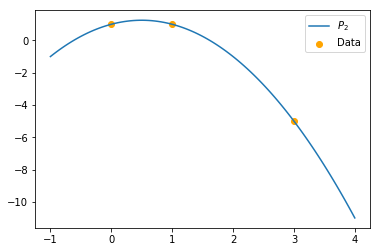

In [41]:
# Plot of P2 and the data
# Carles Falcó i Gandia
# 22/10/18
t = linspace(-1,4,100)
tt = [inter_poly(xj, fxj, i) for i in t]
plt.scatter(xj, fxj, color = 'orange',label= 'Data')
plt.plot(t, tt,label = '$P_2$')
plt.legend()
plt.show()

We can now guess the value of $f(2)$ using $P_2$

In [42]:
# Estimating value of f(2)
# INPUT x = 2
# OUTPUT P_2(2) \approx f(2)
# Carles Falcó i Gandia
# 22/10/18
print( 'f(2) is approximately P_2(2) = ', inter_poly(xj,fxj,2))

f(2) is approximately P_2(2) =  -1.0


In this case we could have done it "by hand" too. The Elementary Lagrange polynomials are:
$$l_0(x)=\frac{(x-1)(x-3)}{(0-1)(0-3)}=\frac{(x-1)(x-3)}{3}$$
$$l_1(x)=\frac{(x-0)(x-3)}{(1-0)(1-3)}=\frac{(x(x-3)}{-2}$$
$$l_2(x)=\frac{(x-0)(x-1)}{(3-0)(3-1)}=\frac{x(x-1)}{6}$$

Then we have $$P_2(x)=\frac{(x-1)(x-3)}{3}+\frac{(x(x-3)}{-2}-5\frac{x(x-1)}{6}=-x^2+x+1$$ 
and we see that $f(2)\approx P_2(2)=-1$.

Using Newton divided differenceswe get the same result:
    $$f[0]=1,\; f[0,1] = 0, \; f[1,3] = -3,\;f[0,1,3] = -1$$
 and then $$P_2(x)=1-1(x-1)x = -x^2+x+1$$

# About Lebesgue function

(a) We'll write first a code that allows us to compute $$L_n(x)=\sum_{j=0}^m|l_j(x)|$$ for a set of pairwise distinct nodes $x_0,x_1,\ldots,x_n$.


In [43]:
# Lebesgue function. We'll use the previous definition of
# elementary_lagrange_poly()
# INPUT: x variable, nodes_set = [x_0,...,x_n] nodes (we assume all of
# them to be pairwise distint)
# OUTPUT: L_n(x) for nodes_set
# Carles Falcó i Gandia
# 24/10/18
def lebesgue_f(x,nodes_set):
    l = []
    for i in range(0,len(nodes_set)):
        l.append( abs(elementary_lagrange_poly(nodes_set,x,i)) )
    return sum(l)

(b) Now we'll plot $L_n(x)$ for a set of n+1 equidistributed points. We'll study different cases changing $n$ and we'll estimate $$\Lambda_n=\vert\vert L_n(x)\vert\vert_{\infty }$$.

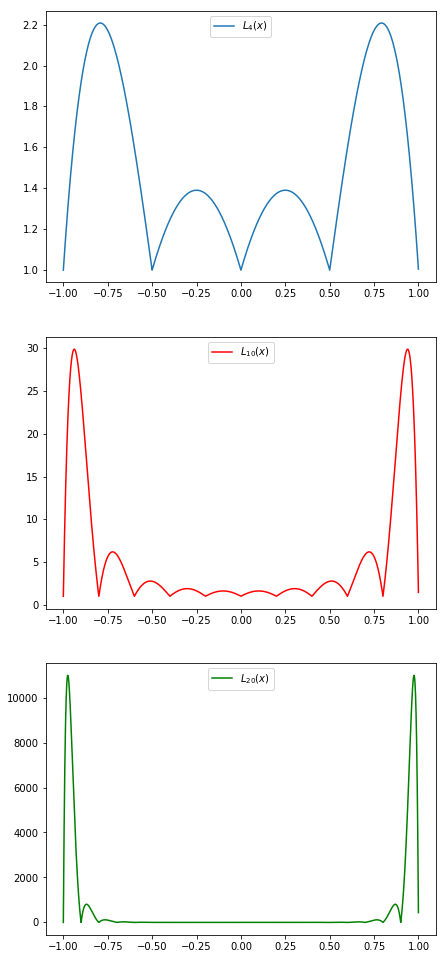

In [44]:
# Plotting L_n(x)
# INPUT: points_n (set of nodes), n (number of points-1)
# OUTPUT: Plot
# Carles Falcó i Gandia
# 24/10/18
n1 = 4
n2 = 10
n3 = 20
ne = 5000
points_1 = [ -1 + j*2/n1 for j in range(0, n1 + 1) ]
points_2 = [ -1 + j*2/n2 for j in range(0, n2 + 1) ]
points_3 = [ -1 + j*2/n3 for j in range(0, n3 + 1) ]
x_k = arange(-1, 1, 2/ne) # [-1,1]
#L_n(x) for x in [-1,1]:
Lx_k1 = [lebesgue_f(i, points_1) for i in x_k] 
Lx_k2 = [lebesgue_f(i, points_2) for i in x_k]
Lx_k3 = [lebesgue_f(i, points_3) for i in x_k]

#Plots
plt.figure( figsize=(7,17))

plt.subplot(3,1,1)
plt.plot(x_k, Lx_k1, label = '$L_%i(x)$' %n1)
plt.legend()

plt.subplot(3,1,2)
plt.plot(x_k, Lx_k2, label = '$L_{%i}(x)$' %n2, color = 'r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x_k, Lx_k3, label = '$L_{%i}(x)$' %n3, color = 'g')
plt.legend()

plt.show()

In [45]:
# We'll estimate the Lebesgue constant now
# INPUT Lx_kn for n=4,10,20
# OUTPUT Lambda_n
# Carles Falcó i Gandia
# 24/10/18
# Since we have a good resolution (ne big) we can take the max 
# of Lx_kn to estimate Lambda_n
lambdas = [max(Lx_k1), max(Lx_k2), max(Lx_k3)]
dat = {' $\Lambda_n$ ': lambdas}
DataFrame(data = dat, index = [4,10,20])
# Left column for different values of n

,$\Lambda_n$
4,2.207824
10,29.899795
20,10986.657406


(c) Now we'll do the same for the Chebyshev nodes $x_j=\cos(j\pi/n)$ for $j=0,\ldots,n$.

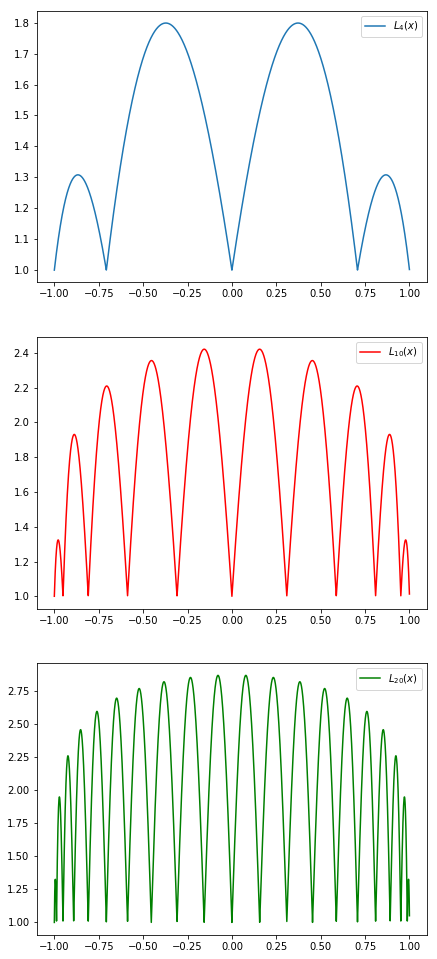

In [46]:
# We just copy the above code modifying the nodes set
# INPUT: points_n (set of nodes), n (number of points-1)
# OUTPUT: Plot
# Carles Falcó i Gandia
# 24/10/18
points_1_chev = [ cos(j*pi/n1) for j in range(0, n1 + 1) ]
points_2_chev = [ cos(j*pi/n2) for j in range(0, n2 + 1) ]
points_3_chev = [ cos(j*pi/n3) for j in range(0, n3 + 1) ]

#L_n(x) for x in [-1,1]:
Lx_k1_chev = [lebesgue_f(i, points_1_chev) for i in x_k] 
Lx_k2_chev = [lebesgue_f(i, points_2_chev) for i in x_k]
Lx_k3_chev = [lebesgue_f(i, points_3_chev) for i in x_k]

#Plots
plt.figure( figsize=(7,17))

plt.subplot(3,1,1)
plt.plot(x_k, Lx_k1_chev, label = '$L_%i(x)$' %n1)
plt.legend()

plt.subplot(3,1,2)
plt.plot(x_k, Lx_k2_chev, label = '$L_{%i}(x)$' %n2, color = 'r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x_k, Lx_k3_chev, label = '$L_{%i}(x)$' %n3, color = 'g')
plt.legend()

plt.show()

In [47]:
# The same as before
# INPUT Lx_kn_chev for n=4,10,20
# OUTPUT Lambda_n
# Carles Falcó i Gandia
# 24/10/18
lambdas_chev = [max(Lx_k1_chev), max(Lx_k2_chev), max(Lx_k3_chev)]
dat = {' $\Lambda_n$ ': lambdas_chev}
DataFrame(data = dat, index = [4,10,20])
# Left column for different values of n

,$\Lambda_n$
4,1.798762
10,2.420969
20,2.867810


We see that for the case of a set of equispaced nodes the maximum values of the Lebesgue function are around the interval extrema. These maximum values are around $x=0$ for the Chebyshev nodes. Moreover in both cases $\Lambda_n$ increases with $n$ but in the first one we get much larger $\Lambda_n$.

# Implementing the Barycentric formula

for evaluating the interpolating polynomial of arbitrarly distributed nodes. We'll use:
$$p_n(x)=\frac{\sum_{j=0}^{n}\frac{\lambda_j}{x-x_j}f_j}{\sum_{j=0}^{n}\frac{\lambda_j}{x-x_j}}$$ for $x\neq x_j$ and $j=0,\ldots,n$ where the weights $\lambda_j$ are computed as $$\lambda_j=\frac{1}{\prod_{k=0,\;k\neq j}^n (x_j-x_k)}$$

In [48]:
# Computing the baricentric weigths
# INPUT: nodes_set (set of nodes), fnodes_set ( f(nodes_set))
# OUTPUT: [lambda_1, lambda_2,...,lambda_n]
# Carles Falcó i Gandia
# 24/10/18 
def bari_weights(nodes_set):
    weights = []
    for i in range(0,len(nodes_set)):
        l = []
        for j in range(0,len(nodes_set)):
            if j != i:
                l.append(nodes_set[j] - nodes_set[i])
        weights.append(1/prod(l))
    return weights

# Computing the interpolating polynomial
# INPUT: nodes_set (set of nodes), fnodes_set ( f(nodes_set)), x (variable)
# OUTPUT: p_n(x)
# Carles Falcó i Gandia
# 24/10/18
def bari_inter_poly(x,nodes_set,fnodes_set):
    l1 = [bari_weights(nodes_set)[i]*fnodes_set[i]/(x-nodes_set[i]) 
          for i in range(0,len(nodes_set))]
    l2 = [bari_weights(nodes_set)[i]/(x-nodes_set[i])
          for i in range(0,len(nodes_set))]
    return sum(l1)/sum(l2)
# Implementation tested with Problem 1 (OK)

In [49]:
# Showing data
x_dat = [0.00, 0.25, 0.52, 0.74, 1.28, 1.50]
fx_dat = [0.0000, 0.7070, 1.0000, 0.7071, -0.7074, -1.0000]
data2 = {'x_j': x_dat, 'f(x_j)': fx_dat}
DataFrame( data = data2, index = [1,2,3,4,5,6])

,f(x_j),x_j
1,0.0000,0.00
2,0.7070,0.25
3,1.0000,0.52
4,0.7071,0.74
5,-0.7074,1.28
6,-1.0000,1.50


In [50]:
# Approximating f(2)
# INPUT: x_dat, fx_dat, x=2
# OUTPUT: P_5(2)
# Carles Falcó i Gandia
# 24/10/18
print('P_5(2) = ', bari_inter_poly(2,x_dat,fx_dat))

P_5(2) =  -2.34382960817


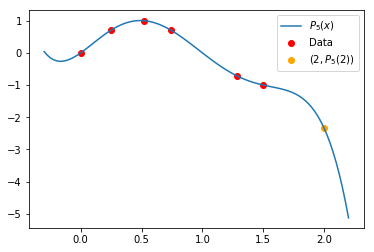

In [51]:
# We can check now that the polynomial indeed interpolates all points
t = linspace(-0.3,2.2,100)
plt.scatter(x_dat,fx_dat,color='r',label='Data')
plt.scatter(2,bari_inter_poly(2,x_dat,fx_dat),
             color='orange',label='$(2,P_5(2))$')
plt.plot(t,bari_inter_poly(t,x_dat,fx_dat),label='$P_5(x)$')
plt.legend()
plt.show()

# The Runge example

We have $$f(x)=\frac{1}{1+25x^2}$$

In [52]:
# We'll modify the barycentric formula code so that we use the weights
# for a set of equispaced nodes and a set of Chebyshev nodes.
# Computing the interpolating polynomial
# INPUT: nodes_set (set of nodes), fnodes_set 
# ( f(nodes_set)), x (variable)
# OUTPUT: p_n(x)
# Carles Falcó i Gandia
# 24/10/18

#using weights for equispaced nodes
def Eq_bari_inter_poly(x,nodes_set,fnodes_set): 
    n = len(nodes_set) - 1
    weights = [(-1)**j*factorial(n)/factorial(j)/factorial(n-j)
               for j in range(0,n+1)]
    l1 = [weights[i]*fnodes_set[i]/(x-nodes_set[i])
          for i in range(0,len(nodes_set))]
    l2 = [weights[i]/(x-nodes_set[i])
          for i in range(0,len(nodes_set))]
    return sum(l1)/sum(l2)

#using weights for Chebyshev nodes
def Ch_bari_inter_poly(x,nodes_set,fnodes_set): 
    weights = [(-1)**j for j in range(1,len(nodes_set)-1)]
    weights.insert(0,1/2)
    weights.append(1/2*(-1)**(len(nodes_set)-1))
    l1 = [weights[i]*fnodes_set[i]/(x-nodes_set[i])
          for i in range(0,len(nodes_set))]
    l2 = [weights[i]/(x-nodes_set[i])
          for i in range(0,len(nodes_set))]
    return sum(l1)/sum(l2)

(a) Now we'll evaluate and plot $p_n$ of $f$ corresponding to a set of equispaced nodes $x_j=-1+2j/n$ for $n=4,8,12$.

C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


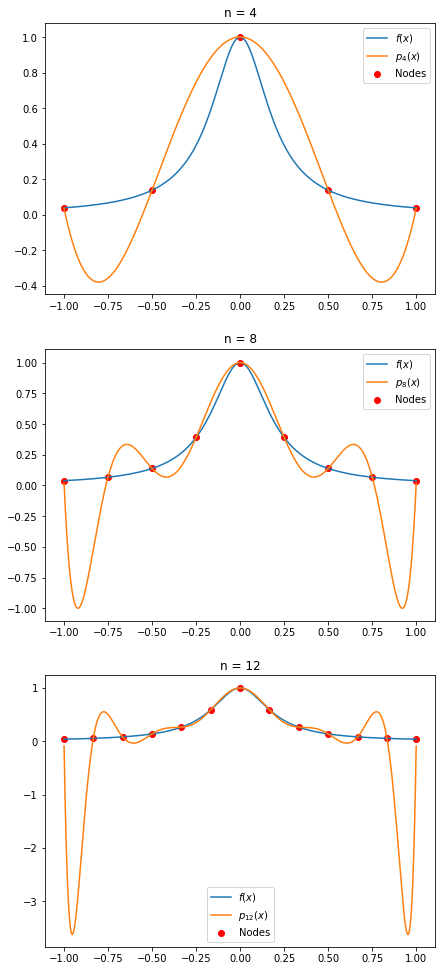

In [53]:
# Evaluating and plotting p_n for different n
# INPUT: n, function f
# OUTPUT: Plots 
# Carles Falcó i Gandia
# 24/10/18

def eqxj(n): # INPUT: n 
    return [-1 + 2*j/n for j in range(0,n+1)] 
# OUTPUT: set of equispaced nodes

def feqxj(f,n): # INPUT: n, function f
    return [f(i) for i in eqxj(n)] 
# OUTPUT: image by f of the set of nodes

n1 = [4,8,12] # Possible values of n
t = linspace(-1,1,3000)

#Plotting
plt.figure(figsize=(7,17))
k = 1
for i in n1:
    plt.subplot(3,1,k)
    plt.scatter(eqxj(i),feqxj(lambda x: 1/(1+25*x**2),i),
                color = 'r', label = 'Nodes')
    plt.plot(t, 1/(1+25*t**2), label = '$f(x)$')
    plt.plot(t,Eq_bari_inter_poly(t,eqxj(i),
                feqxj(lambda x: 1/(1+25*x**2),i)),label = '$p_{%i}(x)$' %i)
    plt.title('n = %i' %i)
    plt.legend()
    k = k + 1

plt.show()
# We get the warning when x = x_j coincides with an interpolating node

(b) Now we'll do the same but using sets of Chebyshev nodes $x_j = \cos(j\pi/n)$ for $j=0,\ldots,n$ with $n=4,8,12,100$.

C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


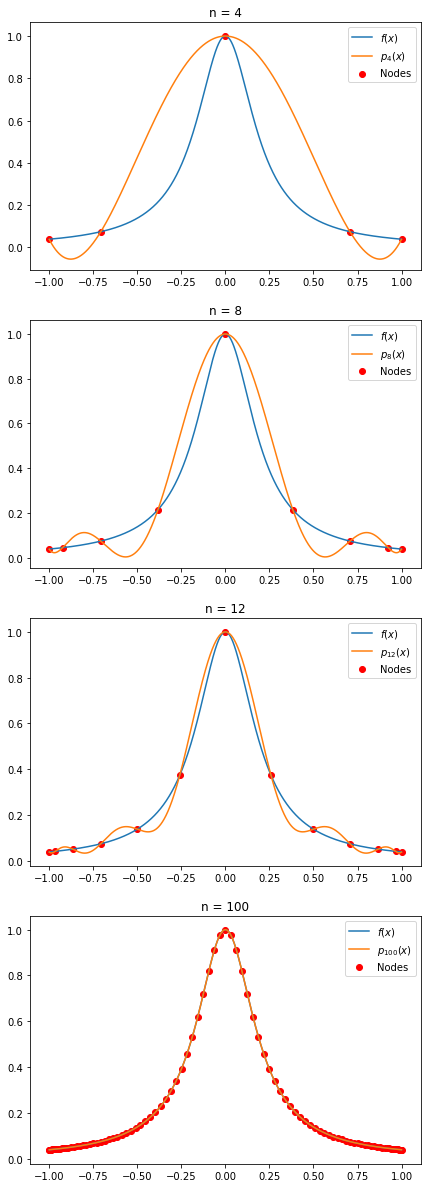

In [54]:
# Evaluating and plotting p_n for different n
# We slighly change the previous code
# INPUT: n, function f
# OUTPUT: Plots 
# Carles Falcó i Gandia
# 24/10/18

def chxj(n): # INPUT: n 
    return [cos(j*pi/n) for j in range(0,n+1)] 
# OUTPUT: set of equispaced nodes

def fchxj(f,n): # INPUT: n, function f
    return [f(i) for i in chxj(n)] 
# OUTPUT: image by f of the set of nodes

n2 = [4,8,12,100] # Possible values of n

#Plotting
plt.figure(figsize=(7,21))
k = 1
for i in n2:
    plt.subplot(4,1,k)
    plt.scatter(chxj(i),fchxj(lambda x: 1/(1+25*x**2),i),
                color = 'r', label = 'Nodes')
    plt.plot(t, 1/(1+25*t**2), label = '$f(x)$')
    plt.plot(t,Ch_bari_inter_poly(t,chxj(i),fchxj(lambda x: 1/(1+25*x**2),i)),
             label = '$p_{%i}(x)$' %i)
    plt.title('n = %i' %i)
    plt.legend()
    k = k + 1

plt.show()
# We get the warning when x = x_j coincides with an interpolating node

(c) Now we'll plot the error $e_n=f-p_n$ for both cases.

C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


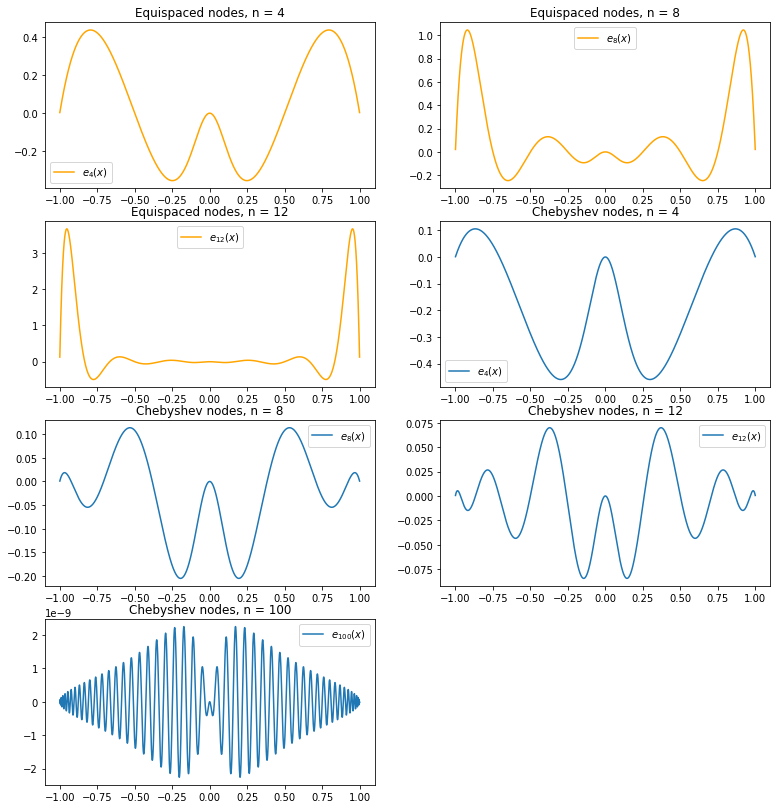

In [55]:
# Plotting error function
# INPUT: n1, n2 and function
# OUTPUT: Plots
# Carles Falcó i Gandia
# 24/10/18

k = 1
l = 4
plt.figure(figsize=(13,25))
for i in n1:
    plt.subplot(7,2,k)
    plt.title('Equispaced nodes, n = %i' %i)
    plt.plot(t,1/(1+25*t**2)-Eq_bari_inter_poly(t,eqxj(i),feqxj(lambda x: 1/(1+25*x**2),i))
            ,label = '$e_{%i}(x)$' %i, color = 'orange')
    plt.legend()
    k = k + 1
for j in n2:
    plt.subplot(7,2,l)
    plt.title('Chebyshev nodes, n = %i' %j)
    plt.plot(t,1/(1+25*t**2)-Ch_bari_inter_poly(t,chxj(j),fchxj(lambda x: 1/(1+25*x**2),j)) ,
             label = '$e_{%i}(x)$' %j)
    plt.legend()
    l = l + 1
plt.show()

C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


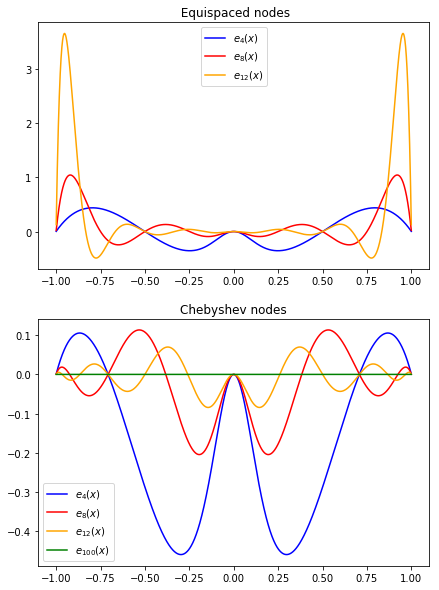

In [56]:
# Or we can visualize them together to compare errors
# Carles Falcó i Gandia
# 24/10/18

colors = ['b','r','orange','g']
plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
plt.title(' Equispaced nodes')
k = 0
for i in n1:
    plt.plot(t,1/(1+25*t**2)-Eq_bari_inter_poly(t,eqxj(i),feqxj(lambda x: 1/(1+25*x**2),i)) ,
             label = '$e_{%i}(x)$' %i, color = colors[k])
    plt.legend()
    k = k + 1
k = 0
plt.subplot(2,1,2)
for j in n2:
    plt.title('Chebyshev nodes')
    plt.plot(t,1/(1+25*t**2)-Ch_bari_inter_poly(t,chxj(j),fchxj(lambda x: 1/(1+25*x**2),j)) 
             ,label = '$e_{%i}(x)$' %j, color = colors[k])
    plt.legend()
    k = k + 1
plt.show()

This is an example that raising the number of equispaced nodes does not guarantee convergence to the function $f$ neither better accuracy. In this case, we get even greater values of the maximum error as $n$ increases in the case of a set of equispaced nodes. On the other hand, according to the plots, we observe that $p_n$ converges to $f$ as $n$ increases in the second case, where Chebyshev nodes are used. Also the errors we have by using Chebyshev nodes are significantly smaller than the ones we get when we use equispaced nodes.

(d) Now we'll repeat (a) using $$g(x)=e^{-x^2},\;\; x\in [-1,1]$$

C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Carles\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


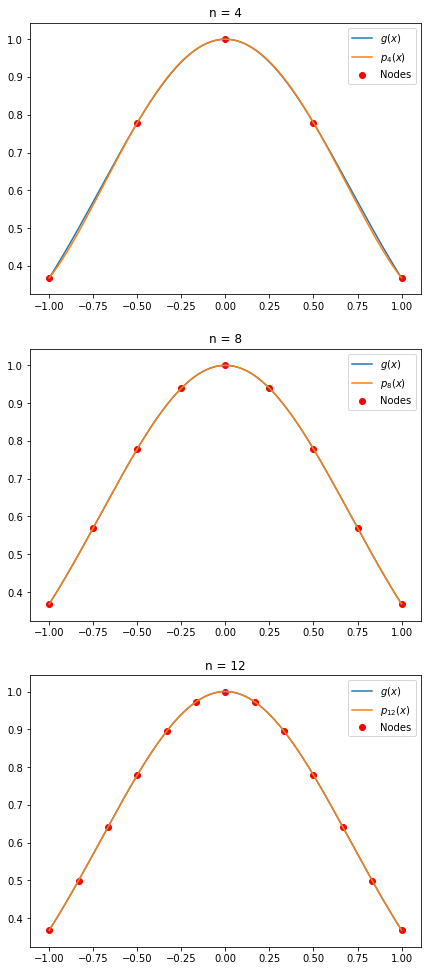

In [57]:
# We copy the code from (a). Just changing the function as a parameter
# Carles Falcó i Gandia
# 24/10/2018
#Plotting

plt.figure(figsize=(7,17))
k = 1
for i in n1:
    plt.subplot(3,1,k)
    plt.scatter(eqxj(i),feqxj(lambda x: exp(-x**2),i), 
                color = 'r', label = 'Nodes')
    plt.plot(t, e**(-t**2), label = '$g(x)$')
    plt.plot(t,Eq_bari_inter_poly(t,eqxj(i),feqxj(lambda x: exp(-x**2),i)),
             label = '$p_{%i}(x)$' %i)
    plt.title('n = %i' %i)
    plt.legend()
    k = k + 1

plt.show()
# We get the warning when x = x_j coincides with an interpolating node

Unlike in the Runge example in this case we see that $p_n$ seems to converge to $g$ as $n$ increases. Furthermore we improve our accuracy by using a higher number of equispaced nodes.

We can conclude thus claiming that despite the fact that sometimes increasing the number of equispaced nodes gives a better accuracy we can't guarantee it.